**Importing Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.nasnet import NASNetLarge
from sklearn.svm import LinearSVC as Classifier
from sklearn.model_selection import train_test_split
from pylab import *
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Loading Images stored as the numpy array.**

In [3]:
np_X_data_1 = np.load('np_X_NSA_data.npy')
np_Y_data_1 = np.load('np_Y_NSA_data.npy')

<B>Random Choice Classifier

In [4]:
def random_classifier(X):
    return np.random.choice([0,1])

,Accuracy
count,100.000000
mean,0.502547
std,0.021069
min,0.443700
25%,0.487936
50%,0.502011
75%,0.514745
max,0.584450


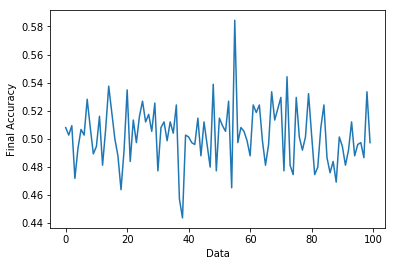

In [5]:
accuracy = [[]]*100
for j in range(100):
    classifications = [[]]*746
    for i in range(746):
        classifications[i] = random_classifier(np_X_data_1[i,:,:])
    accuracy[j] = len(np.where(classifications == np_Y_data_1)[0])/len(classifications)    
plot(accuracy)
xlabel('Data')
ylabel('Final Accuracy')
df = {'Accuracy': accuracy}
table_SVC = pd.DataFrame(data=df)
table_SVC.describe()

**Neural Network**

In [6]:
nasnet_large = NASNetLarge(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(331,331,3)
)


W0910 12:37:41.499674 4675466688 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**SGDClassifier, GradientBoostingClassifier, RandomForestClassifier, DeDecisionTreeClassifier and GaussianNB**

In [7]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
set_of_accuracy=[]
set_of_accuracy_sgd=[]
set_of_accuracy_gbc=[]
set_of_accuracy_rfc=[]
set_of_accuracy_gnb=[]
set_of_accuracy_dtc=[]
##############################################List of precision for classifiers########################################################################
set_of_precision = []
set_of_precision_sgd = []
set_of_precision_gbc = []
set_of_precision_rfc = []
set_of_precision_gnb = []
set_of_precision_dtc = []
##############################################List of precision for classifiers########################################################################
set_of_f1 = []
set_of_f1_sgd = []
set_of_f1_gbc = []
set_of_f1_rfc = []
set_of_f1_gnb = []
set_of_f1_dtc = []
############################################Train and testing classifer##############################################################################
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features = nasnet_large.predict(X_train)
    test_features = nasnet_large.predict(X_test)
################################################Linear SVM#####################################################################
    clf = Classifier(C=20)
    clf.fit(training_features, y_train)
    y_predict = clf.predict(test_features)
    acc = clf.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy.append(acc)  
    set_of_precision.append(precision)
    set_of_f1.append(F1)
###################################################SGD###########################################################################    
    clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    clf_sgd.fit(training_features, y_train)
    y_predict = clf_sgd.predict(test_features)
    acc = clf_sgd.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy_sgd.append(acc)  
    set_of_precision_sgd.append(precision)
    set_of_f1_sgd.append(F1)
###################################################GBD###########################################################################
    clf_gbc = GradientBoostingClassifier()
    clf_gbc.fit(training_features, y_train)
    y_predict_gbc = clf_gbc.predict(test_features)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_gbc = clf_gbc.score(test_features, y_test)
    set_of_accuracy_gbc.append(acc_gbc)  
    set_of_precision_gbc.append(precision)
    set_of_f1_gbc.append(F1)
###################################################RFC###########################################################################
    regr =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    regr.fit(training_features, y_train)
    y_predict_regr = regr.predict(test_features)
    acc_regr = regr.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy_rfc.append(acc_regr)
    set_of_precision_rfc.append(precision)
    set_of_f1_rfc.append(F1)
####################################################GNB###########################################################################
    gnb = GaussianNB()
    gnb.fit(training_features, y_train)
    y_predict_gnb = gnb.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_gbn = gnb.score(test_features, y_test)
    set_of_accuracy_gnb.append(acc_gbn)  
    set_of_precision_gnb.append(precision)
    set_of_f1_gnb.append(F1)
#####################################################DTC##########################################################################
    clf_dtc = DecisionTreeClassifier(random_state=0)
    clf_dtc.fit(training_features, y_train)
    y_predict_dtc = clf_dtc.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_dtc = clf_dtc.score(test_features, y_test)
    set_of_accuracy_dtc.append(acc_dtc)   
    set_of_precision_dtc.append(precision)
    set_of_f1_dtc.append(F1)

**Linear SVC**

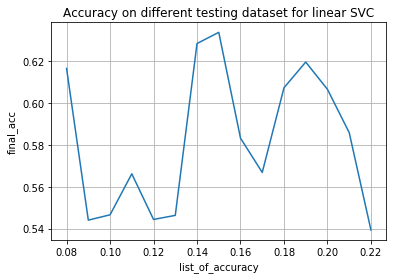

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.582433,0.594053,0.573674
std,0.034237,0.029846,0.038932
min,0.539394,0.549445,0.503053
25%,0.546529,0.569448,0.541051
50%,0.583333,0.594758,0.575000
75%,0.612037,0.620223,0.606565
max,0.633929,0.639054,0.627216


In [8]:
plot(list_of_accuracy,set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for linear SVC')
grid(True)
show()
df = {'Accuracy': set_of_accuracy, 'Precision':set_of_precision, 'F1 Score':set_of_f1}
table_SVC = pd.DataFrame(data=df)
table_SVC.describe()

**Stochastic Gradient Descent**

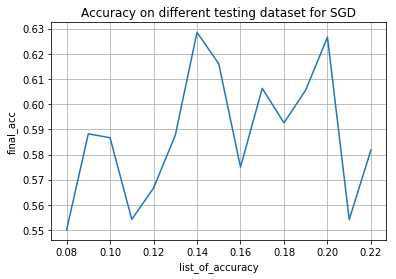

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.588014,0.603147,0.577190
std,0.025344,0.021503,0.031696
min,0.550000,0.558929,0.528577
25%,0.570833,0.589821,0.548275
50%,0.587629,0.608147,0.577747
75%,0.605967,0.616962,0.605276
max,0.628571,0.630629,0.627963


In [9]:
plot(list_of_accuracy,set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
df_sgd = {'Accuracy': set_of_accuracy_sgd, 'Precision':set_of_precision_sgd, 'F1 Score':set_of_f1_sgd}
table_sgd = pd.DataFrame(data=df_sgd)
# table_sgd
table_sgd.describe()

**Gradient Boosting Classifier**

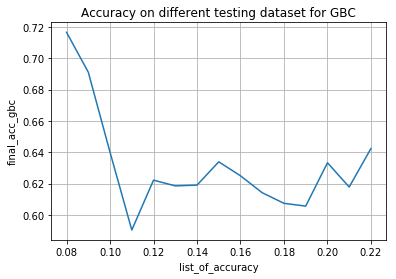

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.631851,0.603147,0.577190
std,0.032616,0.021503,0.031696
min,0.590361,0.558929,0.528577
25%,0.616004,0.589821,0.548275
50%,0.622222,0.608147,0.577747
75%,0.636964,0.616962,0.605276
max,0.716667,0.630629,0.627963


In [10]:
plot(list_of_accuracy,set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc_gbc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
df_gbc = {'Accuracy': set_of_accuracy_gbc,'Precision':set_of_precision_gbc, 'F1 Score':set_of_f1_gbc}
table_gbc = pd.DataFrame(data=df_gbc)
# table_gbc
table_gbc.describe()

**Random Forest Classifier**

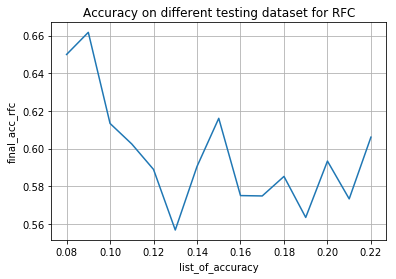

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.596710,0.603147,0.577190
std,0.029641,0.021503,0.031696
min,0.556701,0.558929,0.528577
25%,0.574902,0.589821,0.548275
50%,0.590476,0.608147,0.577747
75%,0.609697,0.616962,0.605276
max,0.661765,0.630629,0.627963


In [11]:
plot(list_of_accuracy,set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc_rfc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
df_rfc = {'Accuracy': set_of_accuracy_rfc, 'Precision':set_of_precision_rfc, 'F1 Score':set_of_f1_rfc}
table_rfc = pd.DataFrame(data=df_rfc)
table_rfc
table_rfc.describe()

**Decision Tree Classifier**

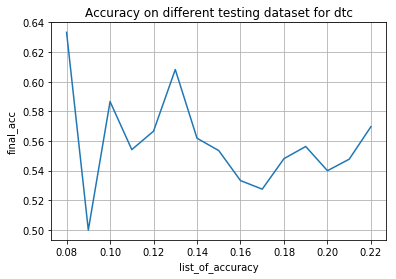

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.559164,0.603147,0.577190
std,0.032393,0.021503,0.031696
min,0.500000,0.558929,0.528577
25%,0.543885,0.589821,0.548275
50%,0.554217,0.608147,0.577747
75%,0.568182,0.616962,0.605276
max,0.633333,0.630629,0.627963


In [12]:
plot(list_of_accuracy,set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for dtc')
grid(True)
show()
df_dtc = {'Accuracy': set_of_accuracy_dtc, 'Precision':set_of_precision_dtc, 'F1 Score':set_of_f1_dtc}
table_dtc = pd.DataFrame(data=df_dtc)
table_dtc
table_dtc.describe()

**Gaussian Naive Bayes**

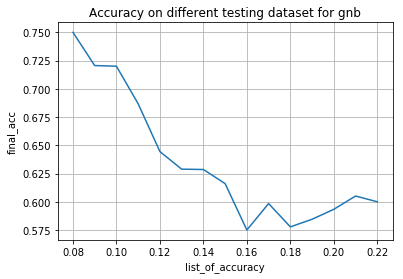

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.635295,0.603147,0.577190
std,0.057068,0.021503,0.031696
min,0.575000,0.558929,0.528577
25%,0.595879,0.589821,0.548275
50%,0.616071,0.608147,0.577747
75%,0.665596,0.616962,0.605276
max,0.750000,0.630629,0.627963


In [13]:
plot(list_of_accuracy,set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for gnb')
grid(True)
show()
df_gnb = {'Accuracy': set_of_accuracy_gnb, 'Precision':set_of_precision_gnb, 'F1 Score':set_of_f1_gnb}
table_gnb = pd.DataFrame(data=df_gnb)
table_gnb
table_gnb.describe()

<B>Comparison of accuracy of all classifier

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'whiskers': [<matplotlib.lines.Line2D at 0x1a6aab37f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6aab3e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6aab3400>,
 'medians': [<matplotlib.lines.Line2D at 0x1a6b281550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a6b281898>,
 'means': []}

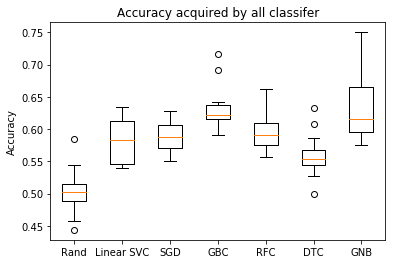

In [14]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,set_of_accuracy,set_of_accuracy_sgd,set_of_accuracy_gbc,set_of_accuracy_rfc,set_of_accuracy_dtc,set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])

<B>Principal Component Analysis (PCA)

In [15]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
pca_set_of_accuracy=[]
pca_set_of_accuracy_sgd=[]
pca_set_of_accuracy_gbc=[]
pca_set_of_accuracy_rfc=[]
pca_set_of_accuracy_gnb=[]
pca_set_of_accuracy_dtc=[]
#############################################List of precision for classifier#########################################################################
pca_set_of_precision = []
pca_set_of_precision_sgd = []
pca_set_of_precision_gbc = []
pca_set_of_precision_rfc = []
pca_set_of_precision_gnb = []
pca_set_of_precision_dtc = []
############################################List of F1 Score for classifier##########################################################################
pca_set_of_f1 = []
pca_set_of_f1_sgd = []
pca_set_of_f1_gbc = []
pca_set_of_f1_rfc = []
pca_set_of_f1_gnb = []
pca_set_of_f1_dtc = []
############################################Train and testing classifer##############################################################################
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_pca = nasnet_large.predict(X_train)
    test_features_pca = nasnet_large.predict(X_test)
    pca = PCA(n_components=400)
    pca.fit(training_features_pca)
    pca_training_features = pca.fit_transform(training_features_pca)
    pca_test_features=pca.transform(test_features_pca)
    # linear SVC
    clf = Classifier(C=20)
    clf.fit(pca_training_features, y_train)
    y_predict = clf.predict(pca_test_features)
    pca_acc_SVC = clf.score(pca_test_features, y_test)
    pca_set_of_accuracy.append(pca_acc_SVC)
    pca_F1 =f1_score(y_test, y_predict, average='weighted')
    pca_precision = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision.append(pca_precision)
    pca_set_of_f1.append(pca_F1)
#    # SGD
    pca_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    pca_clf_sgd.fit(pca_training_features, y_train)
    y_predict = pca_clf_sgd.predict(pca_test_features)
    pca_acc_sgd = pca_clf_sgd.score(pca_test_features, y_test)
    pca_set_of_accuracy_sgd.append(pca_acc_sgd) 
    pca_F1_sgd =f1_score(y_test, y_predict, average='weighted')
    pca_precision_sgd = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_sgd.append(pca_precision_sgd)
    pca_set_of_f1_sgd.append(pca_F1_sgd)
#     #GBC
    pca_clf_gbc = GradientBoostingClassifier()
    pca_clf_gbc.fit(pca_training_features, y_train)
    y_predict_gbc = pca_clf_gbc.predict(pca_test_features)
    pca_acc_gbc = pca_clf_gbc.score(pca_test_features, y_test)
    pca_set_of_accuracy_gbc.append(pca_acc_gbc) 
    pca_F1_gbc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_gbc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_gbc.append(pca_precision_gbc)
    pca_set_of_f1_gbc.append(pca_F1_gbc)
#     # RFC
    pca_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    pca_rfc_clf.fit(pca_training_features, y_train)
    y_predict_regr = pca_rfc_clf.predict(pca_test_features)
    pca_acc_regr = pca_rfc_clf.score(pca_test_features, y_test)
    pca_set_of_accuracy_rfc.append(pca_acc_regr)
    pca_F1_rfc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_rfc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_rfc.append(pca_precision_rfc)
    pca_set_of_f1_rfc.append(pca_F1_rfc)
#     # NB
    pca_clf_gnb = GaussianNB()
    pca_clf_gnb.fit(pca_training_features, y_train)
    y_predict_gnb = pca_clf_gnb.score(pca_test_features, y_test)
    pca_acc_gbn = pca_clf_gnb.score(pca_test_features, y_test)
    pca_set_of_accuracy_gnb.append(pca_acc_gbn)
    pca_F1_gnb =f1_score(y_test, y_predict, average='weighted')
    pca_precision_gnb = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_gnb.append(pca_precision_gnb)
    pca_set_of_f1_gnb.append(pca_F1_gnb)
#     # DTC
    pca_clf_dtc = DecisionTreeClassifier(random_state=0)
    pca_clf_dtc.fit(pca_training_features, y_train)
    y_predict_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_acc_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_set_of_accuracy_dtc.append(pca_acc_dtc) 
    pca_F1_dtc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_dtc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_dtc.append(pca_precision_dtc)
    pca_set_of_f1_dtc.append(pca_F1_dtc)

**Linear SVC with PCA**

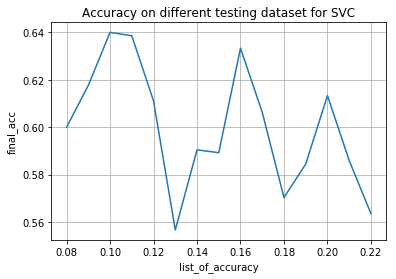

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.600083,0.603402,0.600079
std,0.026141,0.025837,0.026075
min,0.556701,0.556631,0.556607
25%,0.585247,0.589008,0.585620
50%,0.600000,0.603115,0.600893
75%,0.615490,0.621585,0.615490
max,0.640000,0.643585,0.640770


In [16]:
plot(list_of_accuracy,pca_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
pca_df = {'Accuracy': pca_set_of_accuracy, 'Precision':pca_set_of_precision, 'F1 Score':pca_set_of_f1}
pca_table = pd.DataFrame(data=pca_df)
pca_table
pca_table.describe()

**Stochastic Gradient Descent with PCA**

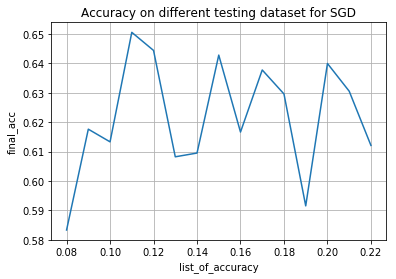

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.621888,0.624473,0.621743
std,0.019729,0.020730,0.019574
min,0.583333,0.582014,0.582512
25%,0.610823,0.611609,0.611009
50%,0.617647,0.621936,0.617647
75%,0.638898,0.642959,0.638721
max,0.650602,0.651198,0.650806


In [17]:
plot(list_of_accuracy,pca_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
pca_df_sgd = {'Accuracy': pca_set_of_accuracy_sgd, 'Precision':pca_set_of_precision_sgd, 'F1 Score':pca_set_of_f1_sgd}
pca_table_sgd = pd.DataFrame(data=pca_df_sgd)
pca_table_sgd
pca_table_sgd.describe()

**Gradient Boasting Classifier with PCA**

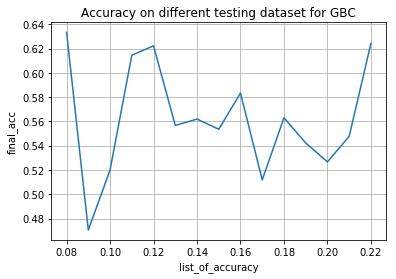

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.562121,0.624473,0.621743
std,0.046580,0.020730,0.019574
min,0.470588,0.582014,0.582512
25%,0.534460,0.611609,0.611009
50%,0.556701,0.621936,0.617647
75%,0.598896,0.642959,0.638721
max,0.633333,0.651198,0.650806


In [18]:
plot(list_of_accuracy,pca_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
pca_df_gbc = {'Accuracy': pca_set_of_accuracy_gbc, 'Precision':pca_set_of_precision_gbc, 'F1 Score':pca_set_of_f1_gbc}
pca_table_gbc = pd.DataFrame(data=pca_df_gbc)
pca_table_gbc
pca_table_gbc.describe()

**Random Forest Classifier with PCA**

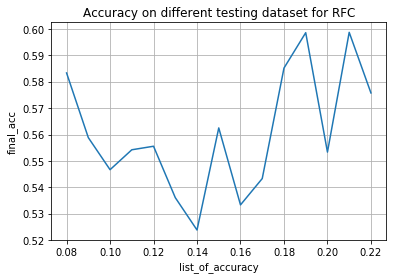

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.560615,0.624473,0.621743
std,0.023246,0.020730,0.019574
min,0.523810,0.582014,0.582512
25%,0.544987,0.611609,0.611009
50%,0.555556,0.621936,0.617647
75%,0.579545,0.642959,0.638721
max,0.598726,0.651198,0.650806


In [19]:
plot(list_of_accuracy,pca_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
pca_df_rfc = {'Accuracy': pca_set_of_accuracy_rfc, 'Precision':pca_set_of_precision_rfc, 'F1 Score':pca_set_of_f1_rfc}
pca_table_rfc = pd.DataFrame(data=pca_df_rfc)
pca_table_rfc
pca_table_rfc.describe()

**Gaussian Naive Bayes with PCA**

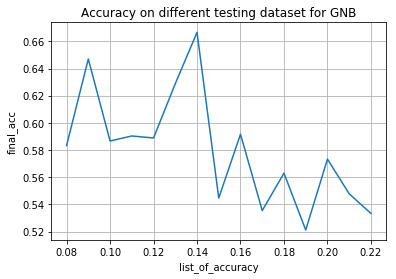

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.580141,0.624473,0.621743
std,0.042281,0.020730,0.019574
min,0.521127,0.582014,0.582512
25%,0.546207,0.611609,0.611009
50%,0.583333,0.621936,0.617647
75%,0.591014,0.642959,0.638721
max,0.666667,0.651198,0.650806


In [20]:
plot(list_of_accuracy,pca_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GNB')
grid(True)
show()
pca_df_gnb = {'Accuracy': pca_set_of_accuracy_gnb, 'Precision':pca_set_of_precision_gnb, 'F1 Score':pca_set_of_f1_gnb}
pca_table_gnb = pd.DataFrame(data=pca_df_gnb)
pca_table_gnb
pca_table_gnb.describe()

**Decision Tree Classifier with PCA**

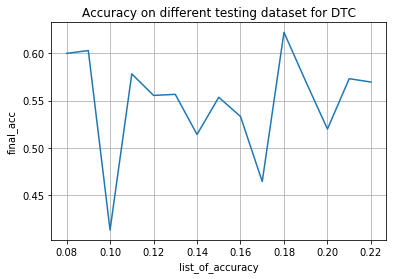

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.548546,0.624473,0.621743
std,0.054217,0.020730,0.019574
min,0.413333,0.582014,0.582512
25%,0.526667,0.611609,0.611009
50%,0.556701,0.621936,0.617647
75%,0.575781,0.642959,0.638721
max,0.622222,0.651198,0.650806


In [21]:
plot(list_of_accuracy,pca_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
pca_df_dtc = {'Accuracy': pca_set_of_accuracy_dtc, 'Precision':pca_set_of_precision_dtc, 'F1 Score':pca_set_of_f1_dtc}
pca_table_dtc = pd.DataFrame(data=pca_df_dtc)
pca_table_dtc
pca_table_dtc.describe()

<B>Comparison of accuracy of all classifier using PCA

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'whiskers': [<matplotlib.lines.Line2D at 0x1a6c80b4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6c80bb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6c80b0f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a6c80bf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a6c812588>,
 'means': []}

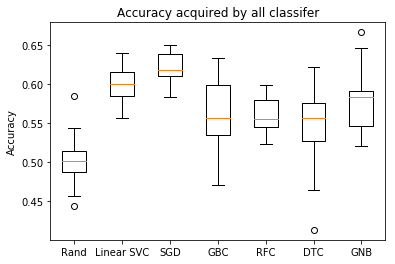

In [22]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,pca_set_of_accuracy,pca_set_of_accuracy_sgd,pca_set_of_accuracy_gbc,pca_set_of_accuracy_rfc,pca_set_of_accuracy_dtc,pca_set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])

**Single Value Decomposition(SVD)**

In [23]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
svd_set_of_accuracy=[]
svd_set_of_accuracy_sgd=[]
svd_set_of_accuracy_gbc=[]
svd_set_of_accuracy_rfc=[]
svd_set_of_accuracy_gnb=[]
svd_set_of_accuracy_dtc=[]
#############################################List of precision for classifier#########################################################################
svd_set_of_precision = []
svd_set_of_precision_sgd = []
svd_set_of_precision_gbc = []
svd_set_of_precision_rfc = []
svd_set_of_precision_gnb = []
svd_set_of_precision_dtc = []
############################################List of F1 Score for classifier##########################################################################
svd_set_of_f1 = []
svd_set_of_f1_sgd = []
svd_set_of_f1_gbc = []
svd_set_of_f1_rfc = []
svd_set_of_f1_gnb = []
svd_set_of_f1_dtc = []

############################################Train and testing classifer##############################################################################

for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_svd = nasnet_large.predict(X_train)
    test_features_svd = nasnet_large.predict(X_test)
    svd = TruncatedSVD(n_components=550,n_iter=7)
    svd.fit(training_features_svd)
    svd_training_features = svd.fit_transform(training_features_svd)
    svd_test_features=svd.transform(test_features_svd)
    # linear SVC
    clf = Classifier(C=20)
    clf.fit(svd_training_features, y_train)
    y_predict = clf.predict(svd_test_features)
    svd_acc_SVC = clf.score(svd_test_features, y_test)
    svd_set_of_accuracy.append(svd_acc_SVC)
    svd_F1 =f1_score(y_test, y_predict, average='weighted')
    svd_precision = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision.append(svd_precision)
    svd_set_of_f1.append(svd_F1)
    # SGD
    svd_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    svd_clf_sgd.fit(svd_training_features, y_train)
    y_predict = svd_clf_sgd.predict(svd_test_features)
    svd_acc_sgd = svd_clf_sgd.score(svd_test_features, y_test)
    svd_set_of_accuracy_sgd.append(svd_acc_sgd)
    svd_F1_sgd =f1_score(y_test, y_predict, average='weighted')
    svd_precision_sgd = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_sgd.append(svd_precision_sgd)
    svd_set_of_f1_sgd.append(svd_F1_sgd)
#     #GBC
    svd_clf_gbc = GradientBoostingClassifier()
    svd_clf_gbc.fit(svd_training_features, y_train)
    y_predict_gbc = svd_clf_gbc.predict(svd_test_features)
    svd_acc_gbc = svd_clf_gbc.score(svd_test_features, y_test)
    svd_set_of_accuracy_gbc.append(svd_acc_gbc)
    svd_F1_gbc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_gbc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_gbc.append(svd_precision_gbc)
    svd_set_of_f1_gbc.append(svd_F1_gbc)
#     # RFC
    svd_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    svd_rfc_clf.fit(svd_training_features, y_train)
    y_predict_regr = svd_rfc_clf.predict(svd_test_features)
    svd_acc_regr = svd_rfc_clf.score(svd_test_features, y_test)
    svd_set_of_accuracy_rfc.append(svd_acc_regr)
    svd_F1_rfc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_rfc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_rfc.append(svd_precision_rfc)
    svd_set_of_f1_rfc.append(svd_F1_rfc)
#     # NB
    svd_clf_gnb = GaussianNB()
    svd_clf_gnb.fit(svd_training_features, y_train)
    y_predict_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_acc_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_set_of_accuracy_gnb.append(svd_acc_gnb)
    svd_F1_gnb =f1_score(y_test, y_predict, average='weighted')
    svd_precision_gnb = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_gnb.append(svd_precision_gnb)
    svd_set_of_f1_gnb.append(svd_F1_gnb)
#     # DTC
    svd_clf_dtc = DecisionTreeClassifier(random_state=0)
    svd_clf_dtc.fit(svd_training_features, y_train)
    y_predict_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_acc_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_set_of_accuracy_dtc.append(svd_acc_dtc) 
    svd_F1_dtc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_dtc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_dtc.append(svd_precision_dtc)
    svd_set_of_f1_dtc.append(svd_F1_dtc)

**Liner SVC with SVD**

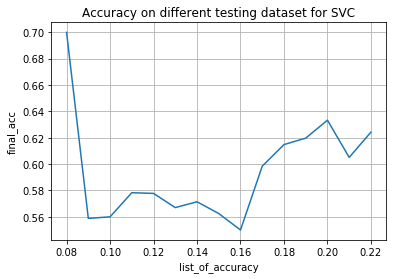

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.594766,0.607430,0.583126
std,0.039637,0.042594,0.041802
min,0.550000,0.555915,0.522649
25%,0.564755,0.575929,0.550899
50%,0.578313,0.601435,0.573062
75%,0.617267,0.627378,0.606254
max,0.700000,0.726667,0.680220


In [24]:
plot(list_of_accuracy,svd_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
svd_df = {'Accuracy': svd_set_of_accuracy, 'Precision':svd_set_of_precision, 'F1 Score':svd_set_of_f1}
svd_table = pd.DataFrame(data=svd_df)
svd_table
svd_table.describe()

**Stochastic Gradient Descent with SVD**

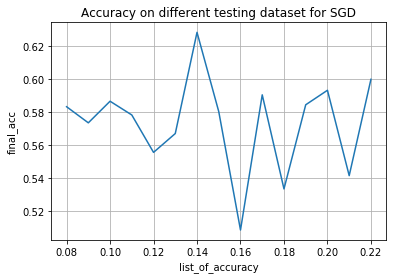

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.573653,0.591678,0.558998
std,0.029441,0.024048,0.048475
min,0.508333,0.538802,0.460796
25%,0.561283,0.575660,0.544821
50%,0.580357,0.597817,0.576830
75%,0.588609,0.602337,0.585151
max,0.628571,0.631407,0.628234


In [25]:
plot(list_of_accuracy,svd_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
svd_df_sgd = {'Accuracy': svd_set_of_accuracy_sgd, 'Precision':svd_set_of_precision_sgd, 'F1 Score':svd_set_of_f1_sgd}
svd_table_sgd = pd.DataFrame(data=svd_df_sgd)
svd_table_sgd
svd_table_sgd.describe()

**Gradient Boasting Classifier with SVD**

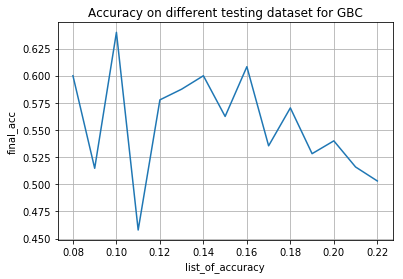

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.556114,0.591678,0.558998
std,0.048254,0.024048,0.048475
min,0.457831,0.538802,0.460796
25%,0.522046,0.575660,0.544821
50%,0.562500,0.597817,0.576830
75%,0.593814,0.602337,0.585151
max,0.640000,0.631407,0.628234


In [26]:
plot(list_of_accuracy,svd_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
svd_df_gbc = {'Accuracy': svd_set_of_accuracy_gbc, 'Precision':svd_set_of_precision_gbc, 'F1 Score':svd_set_of_f1_gbc}
svd_table_gbc = pd.DataFrame(data=svd_df_gbc)
svd_table_gbc
svd_table_gbc.describe()

**Random Forest Classifier with SVD**

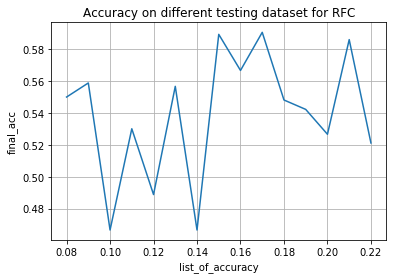

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.539243,0.591678,0.558998
std,0.040181,0.024048,0.048475
min,0.466667,0.538802,0.460796
25%,0.523939,0.575660,0.544821
50%,0.548148,0.597817,0.576830
75%,0.562745,0.602337,0.585151
max,0.590551,0.631407,0.628234


In [27]:
plot(list_of_accuracy,svd_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
svd_df_rfc = {'Accuracy': svd_set_of_accuracy_rfc, 'Precision':svd_set_of_precision_rfc, 'F1 Score':svd_set_of_f1_rfc}
svd_table_rfc = pd.DataFrame(data=svd_df_rfc)
svd_table_rfc
svd_table_rfc.describe()

**Gaussian Naive Bayes with SVD**

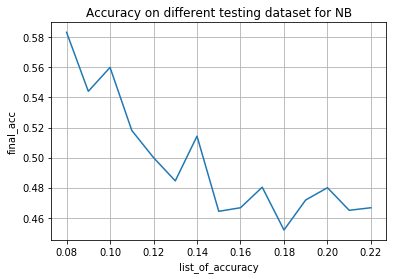

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.496729,0.591678,0.558998
std,0.039392,0.024048,0.048475
min,0.451852,0.538802,0.460796
25%,0.466667,0.575660,0.544821
50%,0.480315,0.597817,0.576830
75%,0.516179,0.602337,0.585151
max,0.583333,0.631407,0.628234


In [28]:
plot(list_of_accuracy,svd_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for NB')
grid(True)
show()
svd_df_gnb = {'Accuracy': svd_set_of_accuracy_gnb, 'Precision':svd_set_of_precision_gnb, 'F1 Score':svd_set_of_f1_gnb}
svd_table_gnb = pd.DataFrame(data=svd_df_gnb)
svd_table_gnb
svd_table_gnb.describe()

**Decision Tree Classifier with SVD**

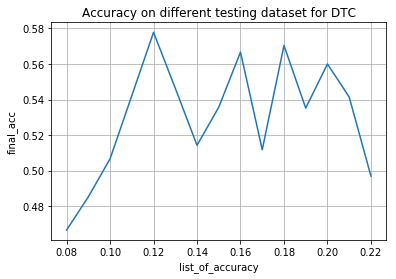

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.530493,0.591678,0.558998
std,0.032714,0.024048,0.048475
min,0.466667,0.538802,0.460796
25%,0.509239,0.575660,0.544821
50%,0.535714,0.597817,0.576830
75%,0.553196,0.602337,0.585151
max,0.577778,0.631407,0.628234


In [29]:
plot(list_of_accuracy,svd_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
svd_df_dtc = {'Accuracy': svd_set_of_accuracy_dtc, 'Precision':svd_set_of_precision_dtc, 'F1 Score':svd_set_of_f1_dtc}
svd_table_dtc = pd.DataFrame(data=svd_df_dtc)
svd_table_dtc
svd_table_dtc.describe()

**Linear SVC classifier graph for Normal , PCA and SVD**

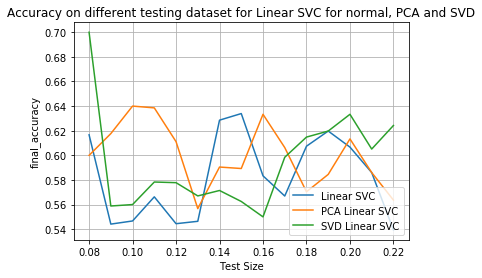

In [30]:
import pylab 
plot(list_of_accuracy,set_of_accuracy,label = 'Linear SVC')
plot(list_of_accuracy,pca_set_of_accuracy,label = 'PCA Linear SVC')
plot(list_of_accuracy,svd_set_of_accuracy, label = 'SVD Linear SVC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Linear SVC for normal, PCA and SVD')
grid(True)

**Stochastic Gradient Descent with PCA classifier for Normal , PCA and SVD**

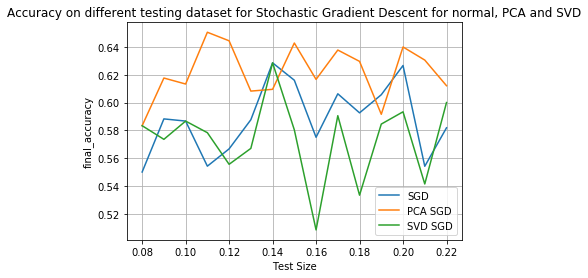

In [31]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_sgd,label = 'SGD')
plot(list_of_accuracy,pca_set_of_accuracy_sgd,label = 'PCA SGD')
plot(list_of_accuracy,svd_set_of_accuracy_sgd, label = 'SVD SGD')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Stochastic Gradient Descent for normal, PCA and SVD')
grid(True)

**Gradient Boasting Classifier for Normal,PCA and SVD**

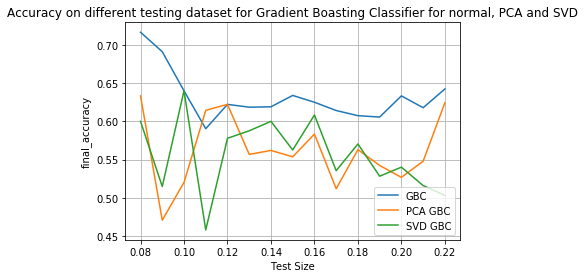

In [32]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_gbc,label = 'GBC')
plot(list_of_accuracy,pca_set_of_accuracy_gbc,label = 'PCA GBC')
plot(list_of_accuracy,svd_set_of_accuracy_gbc, label = 'SVD GBC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Gradient Boasting Classifier for normal, PCA and SVD')
grid(True)

**Random Forest Classifier for Normal,PCA and SVD**

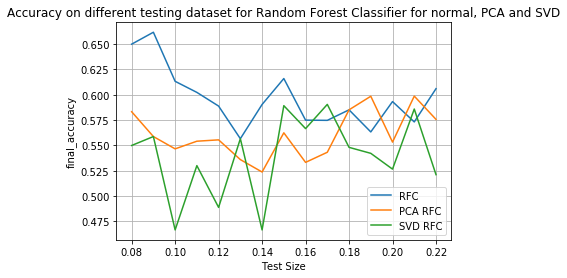

In [33]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_rfc,label = 'RFC')
plot(list_of_accuracy,pca_set_of_accuracy_rfc,label = 'PCA RFC')
plot(list_of_accuracy,svd_set_of_accuracy_rfc, label = 'SVD RFC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Random Forest Classifier for normal, PCA and SVD')
grid(True)

**Gaussian Naive Bayes classifier for Normal,PCA and SVD**

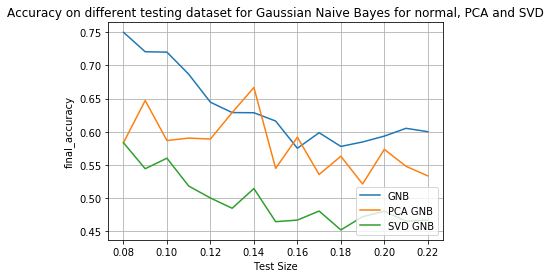

In [34]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_gnb,label = 'GNB')
plot(list_of_accuracy,pca_set_of_accuracy_gnb,label = 'PCA GNB')
plot(list_of_accuracy,svd_set_of_accuracy_gnb, label = 'SVD GNB')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Gaussian Naive Bayes for normal, PCA and SVD')
grid(True)

**Decision Tree Classifier for Normal,PCA and SVD**

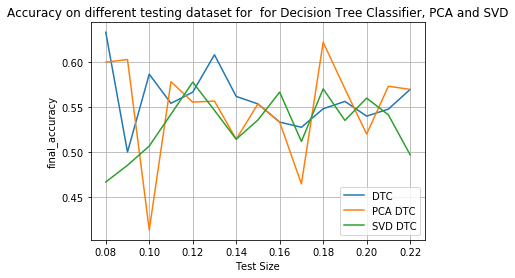

In [35]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_dtc,label = 'DTC')
plot(list_of_accuracy,pca_set_of_accuracy_dtc,label = 'PCA DTC')
plot(list_of_accuracy,svd_set_of_accuracy_dtc, label = 'SVD DTC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for  for Decision Tree Classifier, PCA and SVD')
grid(True)

<B>Comparison of accuracy of all classifier using SVD

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'whiskers': [<matplotlib.lines.Line2D at 0x1a6d568400>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6d568a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6d55dfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a6d568eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a6d56f4a8>,
 'means': []}

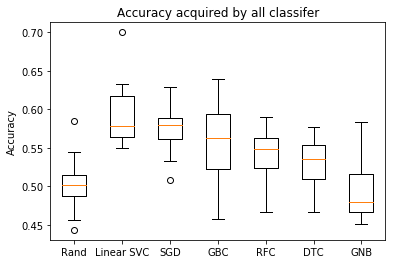

In [36]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,svd_set_of_accuracy,svd_set_of_accuracy_sgd,svd_set_of_accuracy_gbc,svd_set_of_accuracy_rfc,svd_set_of_accuracy_dtc,svd_set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])